In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import calinski_harabasz_score

In [2]:
%load_ext kedro.ipython
%reload_kedro
context.catalog.list()

[09/03/24 19:40:55] INFO     Registered line magic '%reload_kedro'                                   ]8;id=959400;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=687289;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#58\58]8;;\

                    INFO     Registered line magic '%load_node'                                      ]8;id=36651;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=145189;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#60\60]8;;\

                    INFO     Resolved project path as:                                              ]8;id=16232;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=740375;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             c:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/03/24 19:40:58] INFO     Kedro project goodreads-predictor                                      ]8;id=989834;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=246765;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=362999;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=302826;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

[09/03/24 19:41:00] INFO     Registered line magic 'run_viz'                                        ]8;id=60323;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=805196;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\

                    INFO     Resolved project path as:                                              ]8;id=781751;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=382060;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#171\171]8;;\
                             C:\Users\PC\Desktop\PRO-G\ECOLE\DSTI_goodreads\goodreads-predictor.                   
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/03/24 19:41:01] INFO     Kedro project goodreads-predictor                                      ]8;id=2589;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=511173;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#141\141]8;;\

                    INFO     Defined global variable 'context', 'session', 'catalog' and            ]8;id=680624;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=274979;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#142\142]8;;\
                             'pipelines'                                                                           

                    INFO     Registered line magic 'run_viz'                                        ]8;id=216117;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py\__init__.py]8;;\:]8;id=490602;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\ipython\__init__.py#148\148]8;;\


[
    'books_raw',
    'books_loaded',
    'publisher_consolidation',
    'price_by_isbn_input',
    'price_by_isbn',
    'book_genres',
    'title_embeddings_original',
    'authors_embeddings',
    'description_embeddings',
    'open_library_book_api_info_input',
    'open_library_book_api_info',
    'filtered_books',
    'exclusions_summary',
    'scope_waterfall_plot',
    'books_features',
    'feature_cutoffs',
    'factor_lumper',
    'model_train',
    'model_valid',
    'model_test',
    'flaml_model_trained',
    'flaml_model_test_results',
    'flaml_regressor_scatterplot',
    'all_model_results',
    'parameters',
    'params:experiment_names',
    'params:FEATURES',
    'params:TARGET',
    'params:model_config',
    'params:model_config.time_budget',
    'params:model_config.metric',
    'params:model_config.task',
    'params:model_config.estimator_list',
    'params:target_col',
    'params:threshold',
    'params:is_top_n',
    'params:is_percentage',
    'params:tes

In [3]:
train = catalog.load("model_train")

feature_engineering = catalog.load("books_features")

embeddings = catalog.load("description_embeddings")


[09/03/24 19:44:25] INFO     Loading data from model_train (ParquetDataset)...                  ]8;id=31915;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=62025;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from books_features (ParquetDataset)...               ]8;id=694092;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=621076;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

                    INFO     Loading data from description_embeddings (ParquetDataset)...       ]8;id=99285;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=279830;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [5]:
# Show all unique values in 'Descrption' column
print(train['Description'].unique())

['other' 'fiction, mystery detective, general' 'fiction, fantasy, general'
 'fiction, science fiction, general' 'fiction, general'
 'fiction, short stories single author'
 'monty python paid hommage to proust s novel in a sketch first broadcast on november 16th, 1972, called the all england summarize proust competition. the winner was the contestant who could best summarize a la recherche du temps perdu in fifteen seconds, once in a swimsuit and once in evening dress.'
 'continental european fiction fictional works by one author'
 'poetry poetic works by one author'
 'the da vinci code is a 2003 mystery thriller novel by dan brown. it is brown s second novel to include the character robert langdon the first was his 2000 novel angels demons. the da vinci code follows symbologist robert langdon and cryptologist sophie neveu after a murder in the louvre museum in paris causes them to become involved in a battle between the priory of sion and opus dei over the possibility of jesus christ a

In [6]:
embeddings

,isbn13,Description_embedding
0,9780439554893,"[0.006243001203984022, 0.23475420475006104, 0...."
1,9780060920081,"[-0.11963535845279694, -0.18035607039928436, -..."
2,9780439682589,"[0.09263068437576294, -0.11552535742521286, 0...."
3,9780380727506,"[0.12158146500587463, 0.1508733481168747, 0.01..."
4,9780439655484,"[0.2642887830734253, 0.19447514414787292, -0.1..."
...,...,...
11118,9789722330978,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11119,9789722332200,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11120,9789722331685,"[-0.1821971982717514, 0.03799520432949066, 0.0..."
11121,9780140131963,"[-0.18219724297523499, 0.03799523040652275, 0...."


In [7]:
# Merge embeddings dataframe with train dataframe using isbn13 column
merged_df = pd.merge(train, embeddings, on='isbn13')

In [8]:
merged_df

,title,isbn,most_common_author,publisher,language_code,Description,genre,AuthorFameLevel,book_count_category,publisher_book_count_category,...,isbn13,average_rating,num_pages,ratings_count,text_reviews_count,Price,DescriptionISBN,text_reviews_percentage,stratify_col,Description_embedding
0,other,other,other,other,eng,other,non-fiction,4 - popular,3 - many books written,3 - many books published,...,9780674639270,4.06,104.0,2717,232,20.500000,9780674639270,0.085388,True,"[-0.13102854788303375, 0.12431249022483826, -0..."
1,other,other,other,other,eng,other,"fantasy, paranormal",5 - semi-famous,3 - many books written,3 - many books published,...,9780142501528,4.07,400.0,26237,240,9.990000,9780142501528,0.009147,True,"[0.15204975008964539, -0.004199170507490635, -..."
2,other,other,other,pocket books,eng,other,"mystery, thriller, crime",5 - semi-famous,1 - few books written,3 - many books published,...,9780671793562,4.04,414.0,1353,53,7.990000,9780671793562,0.039172,True,"[0.14712105691432953, -0.00915695820003748, -0..."
3,other,other,other,other,eng,other,"history, historical fiction, biography",1 - very low exposure,1 - few books written,3 - many books published,...,9780486285610,3.96,128.0,26,1,16.950000,9780486285610,0.038462,False,"[-0.1782132089138031, 0.4550309479236603, -0.2..."
4,other,other,other,other,eng,other,non-fiction,1 - very low exposure,1 - few books written,1 - few books published,...,9780735200302,3.76,320.0,82,13,15.950000,9780735200302,0.158537,False,"[0.39707937836647034, -0.06530049443244934, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,other,other,other,other,eng,other,fiction,3 - well-known,1 - few books written,3 - many books published,...,9780441581054,4.22,304.0,744,9,3.980000,9780441581054,0.012097,True,"[0.3277033567428589, -0.009578966535627842, 0...."
5864,other,other,other,other,eng,other,"history, historical fiction, biography",4 - popular,2 - some books written,1 - few books published,...,9780064409902,4.05,176.0,4799,88,6.213333,9780064409902,0.018337,True,"[0.1955631673336029, -0.059868767857551575, 0...."
5865,other,other,laurell k. hamilton,berkley,eng,other,"fantasy, paranormal",6 - famous,3 - many books written,3 - many books published,...,9780425204665,4.12,301.0,67686,1409,22.000000,9780425204665,0.020817,True,"[0.12218011915683746, 0.04766867309808731, -0...."
5866,other,other,other,other,eng,other,non-fiction,5 - semi-famous,2 - some books written,3 - many books published,...,9780812971064,3.61,356.0,106493,6561,18.000000,9780812971064,0.061610,False,"[0.4533361494541168, 0.16560034453868866, -0.6..."


In [10]:
# Count number of missing values in each column
merged_df.isna().sum()


title                            0
isbn                             0
most_common_author               0
publisher                        0
language_code                    0
Description                      0
genre                            0
AuthorFameLevel                  0
book_count_category              0
publisher_book_count_category    0
PublisherPriceCategory           0
book_length_category             0
engagement_level                 0
isbn13                           0
average_rating                   0
num_pages                        0
ratings_count                    0
text_reviews_count               0
Price                            0
DescriptionISBN                  0
text_reviews_percentage          0
stratify_col                     0
Description_embedding            0
dtype: int64

In [11]:
# Load filtered_books from catalog 
filtered_books = catalog.load('filtered_books')

[09/03/24 19:49:50] INFO     Loading data from filtered_books (ParquetDataset)...               ]8;id=264375;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py\data_catalog.py]8;;\:]8;id=61946;file://c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\kedro\io\data_catalog.py#508\508]8;;\

In [14]:
filtered_books

,title,isbn,isbn13,most_common_author,average_rating,num_pages,ratings_count,text_reviews_count,publisher,Price,language_code,Description,DescriptionISBN,genre
0,said the shotgun to the head.,0743470796,9780743470797,Saul Williams,4.220000,192.000000,2762,214,MTV Books,14.000,en-US,here is the account of a man so ravished by a ...,9780743470797,poetry
1,$30 Film School: How to Write Direct Produce...,1592000673,9781592000678,Michael W. Dean,3.490000,528.000000,30,4,Cengage Learning,30.000,eng,"motion pictures, digital cinematography, produ...",9781592000678,non-fiction
2,'Salem's Lot,0385516487,9780385516488,Stephen King,4.246005,474.333333,85610,799,Doubleday,33.670,eng,author ben mears returns to salem s lot to wri...,9780385516488,"mystery, thriller, crime"
3,1 000 Places to See Before You Die,0761104844,9780761104841,Patricia Schultz,3.850000,992.000000,36303,439,Workman Publishing Company,19.950,eng,"travel, guidebooks",9780761104841,non-fiction
4,10 lb Penalty,042519745X,9780425197455,Dick Francis,3.900000,320.000000,3490,177,G.P. Putnam's Sons,8.990,eng,"mystery, horse racing, fiction, fiction, gener...",9780425197455,"mystery, thriller, crime"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8379,À tout jamais,2266111108,9782266111102,Nicholas Sparks,4.170000,214.000000,186,22,Pocket,36.370,fre,"children of clergy, fiction, romans, nouvelles...",9782266111102,fiction
8380,Ángeles y demonios (Robert Langdon #1),849561877X,9788495618771,Dan Brown,3.890000,508.000000,196,20,Umbriel,41.225,spa,angels demons is a 2000 bestselling mystery th...,9788495618771,"mystery, thriller, crime"
8381,Мастер и Маргарита,5040019521,9785040019526,Mikhail Bulgakov,4.300000,640.000000,10,1,Эксмо,-999.000,rus,"the battle of competing translations, a new pu...",9785040019526,fiction
8382,犬夜叉 1,409125201X,9784091252012,Rumiko Takahashi,4.270000,192.000000,41,3,小学館,3.730,jpn,"students, comic books, strips, demonology, tim...",9784091252012,"comics, graphic"


In [15]:
# Merge Description column from filtered books to merged_df based on isbn13 column, and rename the column to description_full
merged_df = pd.merge(merged_df, filtered_books[['isbn13', 'Description']], on='isbn13', how='left')

In [16]:
merged_df

,title,isbn,most_common_author,publisher,language_code,Description_x,genre,AuthorFameLevel,book_count_category,publisher_book_count_category,...,average_rating,num_pages,ratings_count,text_reviews_count,Price,DescriptionISBN,text_reviews_percentage,stratify_col,Description_embedding,Description_y
0,other,other,other,other,eng,other,non-fiction,4 - popular,3 - many books written,3 - many books published,...,4.06,104.0,2717,232,20.500000,9780674639270,0.085388,True,"[-0.13102854788303375, 0.12431249022483826, -0...","welty, eudora, 1909 2001, authors, american, m..."
1,other,other,other,other,eng,other,"fantasy, paranormal",5 - semi-famous,3 - many books written,3 - many books published,...,4.07,400.0,26237,240,9.990000,9780142501528,0.009147,True,"[0.15204975008964539, -0.004199170507490635, -...","redwall slumbers in the summer sun, unaware th..."
2,other,other,other,pocket books,eng,other,"mystery, thriller, crime",5 - semi-famous,1 - few books written,3 - many books published,...,4.04,414.0,1353,53,7.990000,9780671793562,0.039172,True,"[0.14712105691432953, -0.00915695820003748, -0...","case studies, homicide, criminals, murder, cri..."
3,other,other,other,other,eng,other,"history, historical fiction, biography",1 - very low exposure,1 - few books written,3 - many books published,...,3.96,128.0,26,1,16.950000,9780486285610,0.038462,False,"[-0.1782132089138031, 0.4550309479236603, -0.2...","armor, weapons, pictorial works, history"
4,other,other,other,other,eng,other,non-fiction,1 - very low exposure,1 - few books written,1 - few books published,...,3.76,320.0,82,13,15.950000,9780735200302,0.158537,False,"[0.39707937836647034, -0.06530049443244934, 0....","man woman relationships, psychology, dating so..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5863,other,other,other,other,eng,other,fiction,3 - well-known,1 - few books written,3 - many books published,...,4.22,304.0,744,9,3.980000,9780441581054,0.012097,True,"[0.3277033567428589, -0.009578966535627842, 0....","science fiction, fiction, science fiction, gen..."
5864,other,other,other,other,eng,other,"history, historical fiction, biography",4 - popular,2 - some books written,1 - few books published,...,4.05,176.0,4799,88,6.213333,9780064409902,0.018337,True,"[0.1955631673336029, -0.059868767857551575, 0....","after grasshoppers ruin the crops, eight year ..."
5865,other,other,laurell k. hamilton,berkley,eng,other,"fantasy, paranormal",6 - famous,3 - many books written,3 - many books published,...,4.12,301.0,67686,1409,22.000000,9780425204665,0.020817,True,"[0.12218011915683746, 0.04766867309808731, -0....",from back cover jove paperback october 2002 th...
5866,other,other,other,other,eng,other,non-fiction,5 - semi-famous,2 - some books written,3 - many books published,...,3.61,356.0,106493,6561,18.000000,9780812971064,0.061610,False,"[0.4533361494541168, 0.16560034453868866, -0.6...",every thursday morning for two years in the is...


In [31]:
# Get a count of unique values from the genre column
genre_counts = merged_df['genre'].nunique()
genre_counts

10

# Clustering 

[09/03/24 20:18:37] WARNING  c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\umap\umap_.py:1 ]8;id=451424;file://c:\Users\PC\.conda\envs\goodread_env\lib\warnings.py\warnings.py]8;;\:]8;id=377638;file://c:\Users\PC\.conda\envs\goodread_env\lib\warnings.py#109\109]8;;\
                             945: UserWarning: n_jobs value 1 overridden to 1 by setting                           
                             random_state. Use no seed for parallelism.                                            
                               warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting                        
                             random_state. Use no seed for parallelism.")                                          
                                                                                                                   

Silhouette Score: 0.3753871


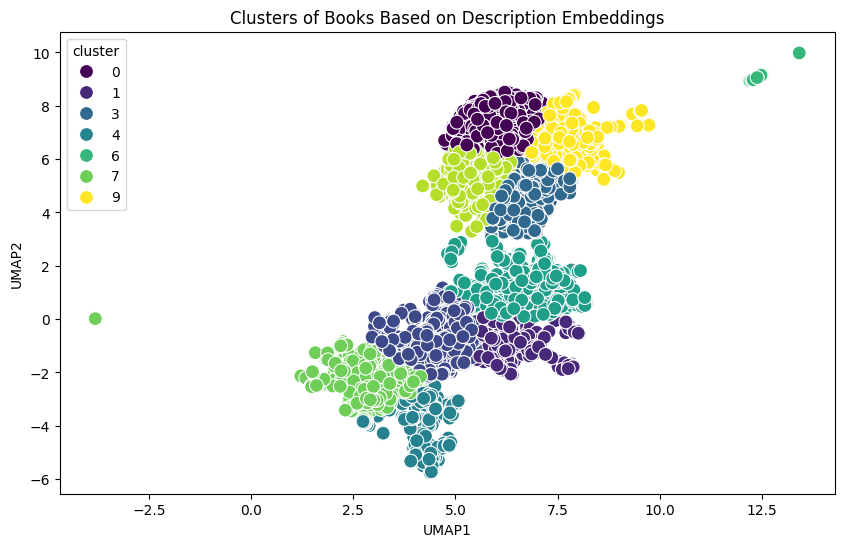

In [32]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap.umap_ as umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assume 'description_embedding' column contains list-like vectors (multi-dimensional)
# Convert the 'description_embedding' column to a numpy array if it's not already
embeddings = np.vstack(merged_df['Description_embedding'].values)

# Flatten the embeddings to 1D
embeddings = embeddings.reshape(embeddings.shape[0], -1)

# Lower the dimension of the description_embedding column using UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)  # Use 2 components for better visualization
reduced_embeddings = umap_model.fit_transform(embeddings)

# Perform KMeans clustering on the reduced embeddings
kmeans = KMeans(n_clusters=10, random_state=42)
merged_df['cluster'] = kmeans.fit_predict(reduced_embeddings)

# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_embeddings, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

# Add the reduced dimensions to the DataFrame for visualization
merged_df['UMAP1'] = reduced_embeddings[:, 0]
merged_df['UMAP2'] = reduced_embeddings[:, 1]

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UMAP1', y='UMAP2', data=merged_df, hue='cluster', palette='viridis', s=100)
plt.title('Clusters of Books Based on Description Embeddings')
plt.show()





# Wordcloud of each cluster

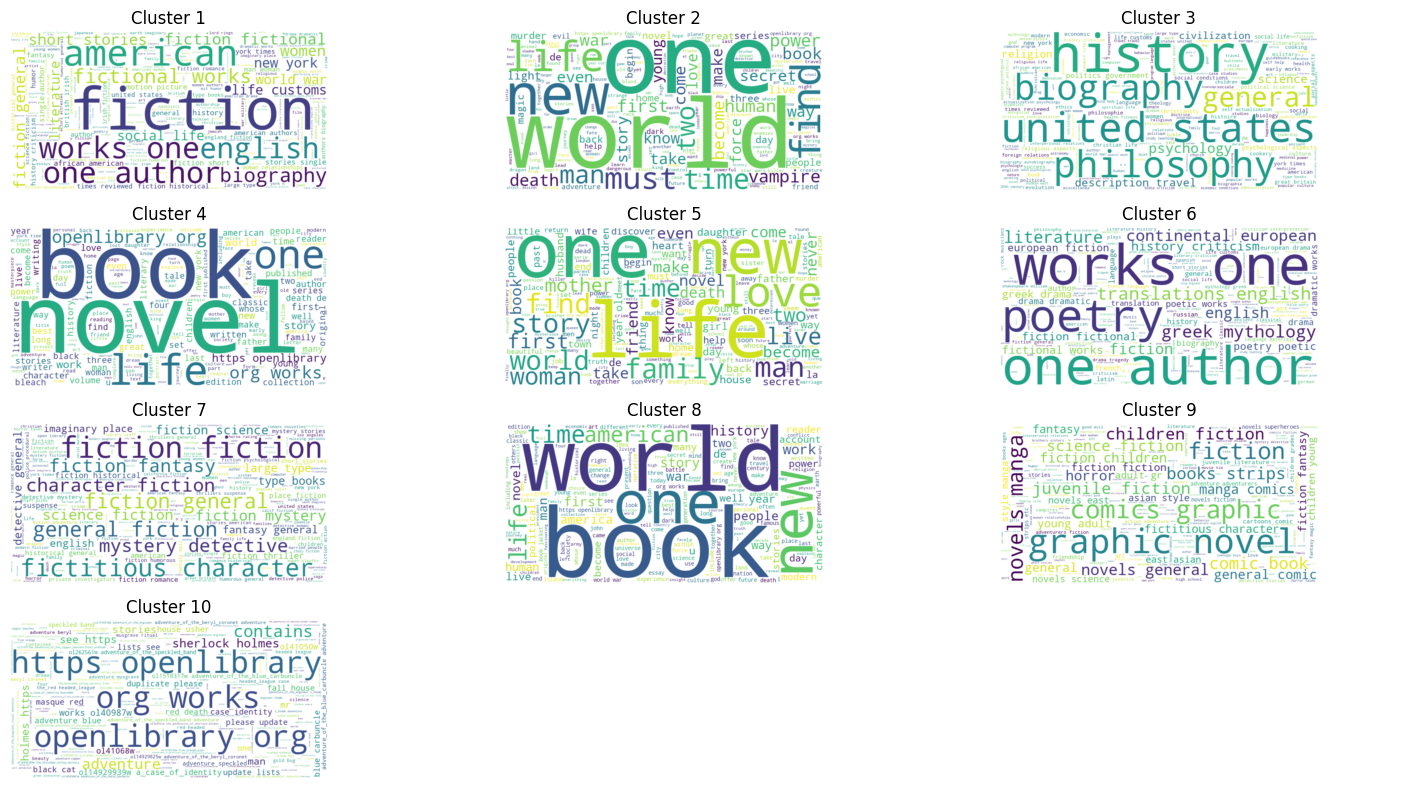

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Define a function to generate a word cloud for a given cluster
def generate_wordcloud(cluster_data):
    text = ' '.join(cluster_data['Description_y'].values)
    # Remove stopwords from the text using NLTK
    from nltk.corpus import stopwords
    from nltk.tokenize import word_tokenize
    stopwords = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stopwords])
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    return wordcloud

# Generate word clouds for each cluster
wordclouds = []
for cluster_id in merged_df['cluster'].unique():
    cluster_data = merged_df[merged_df['cluster'] == cluster_id]
    wordcloud = generate_wordcloud(cluster_data)
    wordclouds.append(wordcloud)

# Determine the grid size for subplots
n_clusters = len(wordclouds)
n_cols = 3
n_rows = (n_clusters + n_cols - 1) // n_cols

# Display the word clouds in a grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i in range(n_clusters):
    axes[i].imshow(wordclouds[i], interpolation='bilinear')
    axes[i].axis('off')
    axes[i].set_title(f'Cluster {i+1}')

# Hide any unused subplots
for i in range(n_clusters, len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


In [63]:
# Comparison of the clustering labels with the genre column of the dataset
pd.crosstab(merged_df['cluster'],merged_df['genre'])

# Create a dataframe with the cluster labels and the genre column
cluster_genre_df = pd.DataFrame({'cluster': merged_df['cluster'], 'genre': merged_df['genre']})



In [64]:
cluster_genre_df

,cluster,genre
0,2,non-fiction
1,9,"fantasy, paranormal"
2,5,"mystery, thriller, crime"
3,5,"history, historical fiction, biography"
4,5,non-fiction
...,...,...
5863,7,fiction
5864,0,"history, historical fiction, biography"
5865,9,"fantasy, paranormal"
5866,8,non-fiction


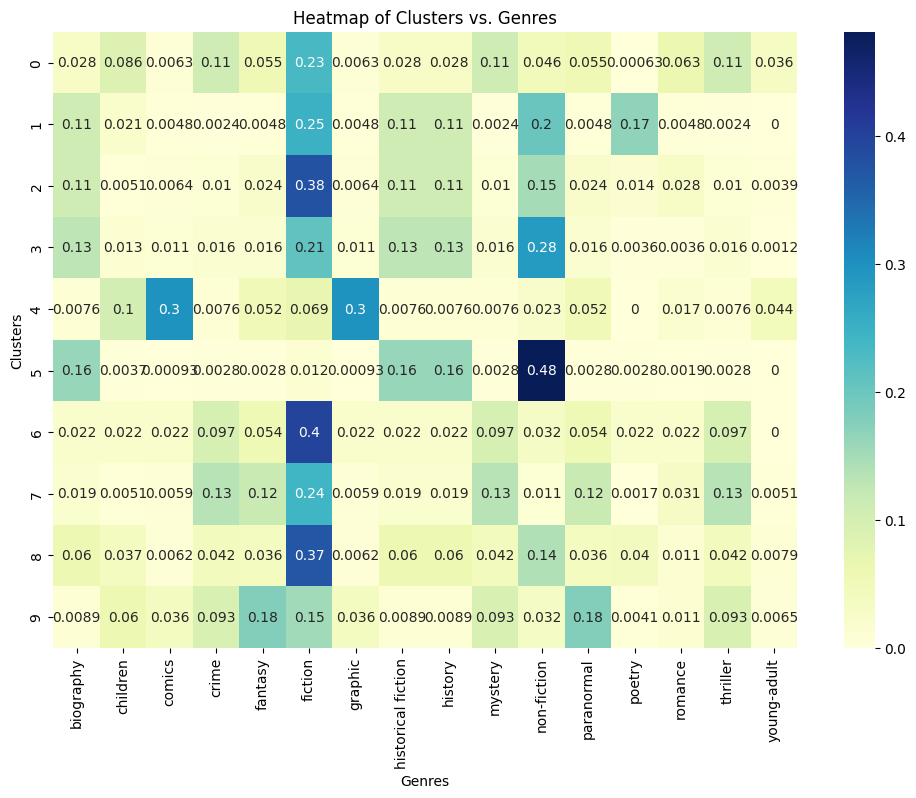

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# One-hot encode the genres
cluster_genre = cluster_genre_df['genre'].str.get_dummies(sep=', ')

# Combine the one-hot encoded genres with the cluster labels
cluster_genre_df_combined = cluster_genre_df[['cluster']].join(cluster_genre)

# Create a contingency table by grouping by clusters and summing the genre counts
contingency_table = cluster_genre_df_combined.groupby('cluster').sum()

# Normalize the contingency table by the number of items in each cluster
contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap='YlGnBu')
plt.title('Heatmap of Clusters vs. Genres')
plt.xlabel('Genres')
plt.ylabel('Clusters')
plt.show()


╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <module>:2                                                                                    │
│                                                                                                  │
│   1 # Create a heatmap of cluster_genre_df                                                       │
│ ❱ 2 sns.heatmap(cluster_genre_df,  annot=True)                                                   │
│   3 plt.title('Cluster Genres')                                                                  │
│   4                                                                                              │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\seaborn\matrix.py:459 in heatmap          │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\seaborn\matrix.py:306 in plot             │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\__init__.py:1473 in inner      │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\axes\_axes.py:6434 in          │
│ pcolormesh                                                                                       │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\collections.py:2146 in         │
│ __init__                                                                                         │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\collections.py:206 in __init__ │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\artist.py:1216 in              │
│ _internal_update                                                                                 │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\artist.py:1192 in              │
│ _update_props                                                                                    │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\collections.py:2020 in         │
│ set_array                                                                                        │
│                                                                                                  │
│ c:\Users\PC\.conda\envs\goodread_env\lib\site-packages\matplotlib\cm.py:452 in set_array         │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
TypeError: Image data of dtype object cannot be converted to float

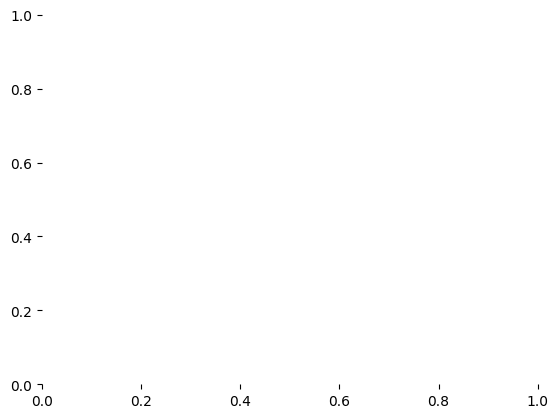